<a href="https://colab.research.google.com/github/alegomezri/Aprendizaje-de-Maquina-avanzado/blob/main/KCCA_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Avanzado de maquina / Andres Marino Alvarez Meza

# Yessica Alejandra Gomez Rivera


# kernel canonical correlation analysis

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp 
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
train, test = tf.keras.datasets.mnist.load_data()
(Xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.mnist.load_data()

Xtrain = Xtrain/255
Xtest = Xtest/255

Xtrain = Xtrain.reshape(Xtrain.shape[0],-1)
Xtest = Xtest.reshape(Xtest.shape[0],-1)
ytrain = ytrain.reshape(-1,1)

Xtrain_ = tf.convert_to_tensor(Xtrain[:,:392],dtype=tf.float32)
ytrain_ = tf.convert_to_tensor(Xtrain[:,392:],dtype=tf.float32)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
Xtrain.shape


(60000, 784)

In [ ]:
ytrain.shape

(60000, 1)

In [ ]:
X = Xtrain_
yn = ytrain_ 

In [ ]:
class MyRegularizer(tf.keras.regularizers.Regularizer): #defino el regularizador/condiciones.
    def __init__(self, lam=2.0):
        self.lam = lam

    def __call__(self, x):
        E = tf.linalg.matmul(x,x,transpose_a=True)-tf.eye(tf.shape(x)[1]) 
        return self.lam * tf.linalg.trace(tf.linalg.matmul(E,E))

  
def custom_loss(num):  #La funcion de costo y el coseno. 
    @tf.function()
    def custom_cca_loss(y_true,y_pred):
      y_1 = y_pred[:,:num] 
      y_2 = y_pred[:,num:] #indexando y recuperando las salidas independientes.
      
      norm_y1 = tf.reshape(tf.norm(y_1,axis=0),(-1,1))
      norm_y2 = tf.reshape(tf.norm(y_2,axis=0),(-1,1))
      norm_matrix = tf.linalg.matmul(norm_y1,norm_y2,transpose_b=True)

      f = tf.linalg.matmul(y_1,y_2,transpose_a=True)/norm_matrix
      f = tf.reduce_mean(f) #pasando el coseno a esta forma.
      return -f
    return custom_cca_loss

In [ ]:
inputx = tf.keras.layers.Input(shape=(X.shape[1],))
inputy = tf.keras.layers.Input(shape=(yn.shape[1],))

num = 50
ouput1 =tf.keras.layers.Dense(num, activation='linear',use_bias=False,name='ouput1',kernel_regularizer=MyRegularizer())(inputx)
ouput2 =tf.keras.layers.Dense(num, activation='linear',use_bias=False,name='ouput2',kernel_regularizer=MyRegularizer())(inputy)

output = tf.keras.layers.Concatenate()([ouput1,ouput2])

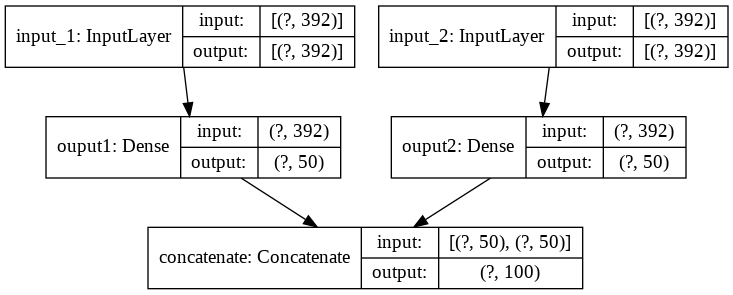

In [ ]:
Modelkcca = tf.keras.Model(inputs=(inputx,inputy), outputs=output, name='KCCA')
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
Modelkcca.compile(optimizer=optimizer,loss=[custom_loss(num)],metrics=custom_loss(num))
tf.keras.utils.plot_model(Modelkcca, show_shapes=True)#creando el modelo y compilando.

In [ ]:
history = Modelkcca.fit(x =[Xtrain_,ytrain_], y=[ytrain_],epochs=100,
                                  batch_size=64, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: -0.4033 - custom_cca_loss: -0.8990 - val_loss: -0.9555 - val_custom_cca_loss: -0.9555
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: -0.9632 - custom_cca_loss: -0.9633 - val_loss: -0.9666 - val_custom_cca_loss: -0.9666
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: -0.9704 - custom_cca_loss: -0.9704 - val_loss: -0.9717 - val_custom_cca_loss: -0.9717
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: -0.9742 - custom_cca_loss: -0.9742 - val_loss: -0.9749 - val_custom_cca_loss: -0.9748
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: -0.9767 - custom_cca_loss: -0.9767 - val_loss: -0.9771 - val_custom_cca_loss: -0.9770
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: -0.9786 - custom_cca_loss: -0.9786 - val_loss: -0.9788 - val_custom_cca_loss: -0.9788
Epoch 7/100
750/750 [=============

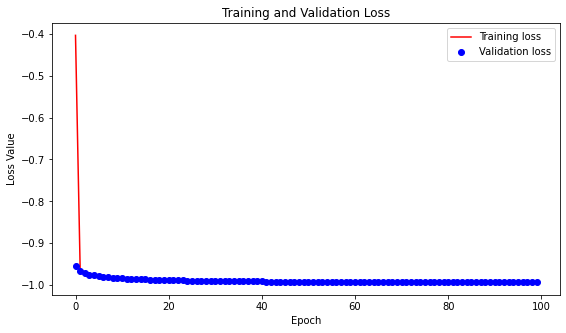

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(100)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

In [ ]:
X.shape

TensorShape([60000, 392])

In [ ]:
modelx = tf.keras.Model(inputs=Modelkcca.input[0],outputs=Modelkcca.get_layer('ouput1').output)
newx = modelx.predict(X)

In [ ]:
modely = tf.keras.Model(inputs=Modelkcca.input[1],outputs=Modelkcca.get_layer('ouput2').output)
newy = modelx.predict(ytrain_)

In [ ]:
newx[2],newy[2]

(array([-0.15352525, -0.16909006, -0.19736564, -0.20651865, -0.19548938,
        -0.20241842, -0.17621934, -0.18741141, -0.2159969 , -0.15732515,
        -0.1940928 , -0.225257  , -0.18466628, -0.15879157, -0.17827344,
        -0.19484814, -0.19125985, -0.16141984, -0.1623397 , -0.21421789,
        -0.1998938 , -0.16317213, -0.15753753, -0.16894881, -0.1407446 ,
        -0.191743  , -0.14677449, -0.17261681, -0.19075319, -0.19933957,
        -0.16852833, -0.21018356, -0.20023608, -0.18515277, -0.17130433,
        -0.19464529, -0.19967155, -0.17660913, -0.17024358, -0.15335065,
        -0.18265754, -0.1708112 , -0.17565465, -0.16301951, -0.190574  ,
        -0.14904985, -0.18453489, -0.16860789, -0.12905422, -0.17720404],
       dtype=float32),
 array([ 0.01814165, -0.13316742,  0.07479846, -0.01831986, -0.03085303,
        -0.5162777 , -0.520447  , -0.22552064, -0.18106091, -0.06165207,
        -0.44240916, -0.6574135 , -0.5509513 ,  0.08050523, -0.13388649,
         0.32866573, -0.164

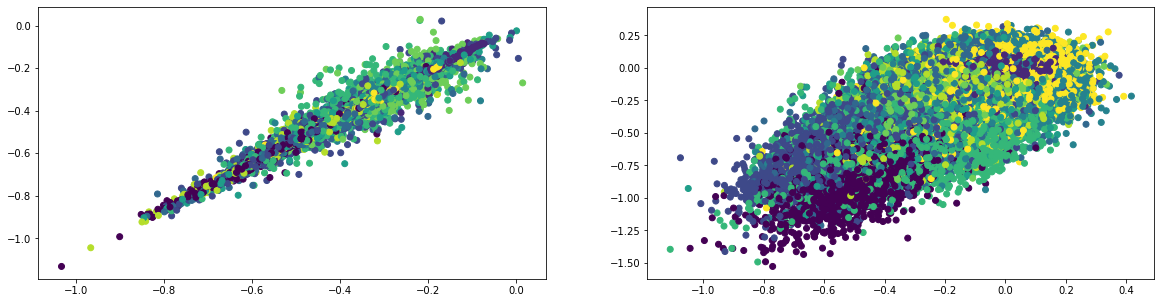

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(newx[:,0],newx[:,1],c=ytrain )

plt.subplot(1,2,2)
plt.scatter(newy[:,0],newy[:,1],c=ytrain )
plt.show()

In [ ]:
inputx = tf.keras.layers.Input(shape=(Xtrain_.shape[1]))#estoy definiendo las entradas del modelo
inputy = tf.keras.layers.Input(shape=(ytrain_.shape[1]))

l1 = 1e-3
l2 = 1e-3
Xw1 =tf.keras.layers.Dense(100, activation='linear',use_bias=False,name='projection1',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2))(inputx)
yw2 =tf.keras.layers.Dense(100, activation='linear',use_bias=False,name='projection2',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2))(inputy)

estimatephix =  tf.keras.layers.experimental.RandomFourierFeatures(output_dim=20,
          scale=11, kernel_initializer='gaussian',trainable= True,name='rbf_fourier_a')(Xw1)
estimatephiy =  tf.keras.layers.experimental.RandomFourierFeatures(output_dim=20,
          scale=11, kernel_initializer='gaussian',trainable= True,name='rbf_fourier_b')(yw2)

num = 2
ouput1 =tf.keras.layers.Dense(num, activation='linear',use_bias=False,name='ouput1',kernel_regularizer=MyRegularizer())(estimatephix)
ouput2 =tf.keras.layers.Dense(num, activation='linear',use_bias=False,name='ouput2',kernel_regularizer=MyRegularizer())(estimatephiy)

output = tf.keras.layers.Concatenate()([ouput1,ouput2])

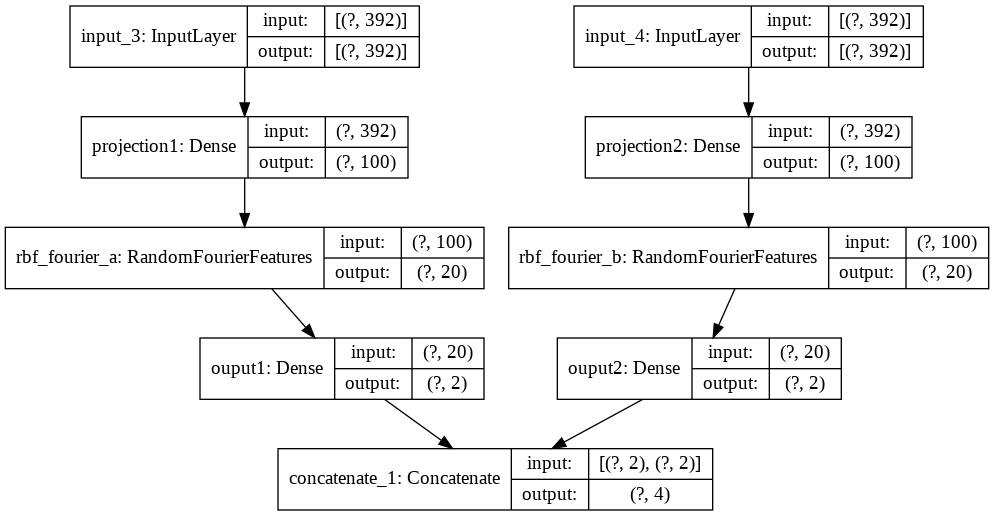

In [ ]:
ModelkccaLR = tf.keras.Model(inputs=(inputx,inputy), outputs=output, name='KCCALR')
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
ModelkccaLR.compile(loss=[custom_loss(num)],metrics=custom_loss(num))
tf.keras.utils.plot_model(ModelkccaLR, show_shapes=True)# creando y compilando el modelo.

In [ ]:
history = ModelkccaLR.fit(x =[Xtrain_,ytrain_], y=[ytrain_],epochs=50,batch_size=240, validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 6ms/step - loss: 0.9829 - custom_cca_loss: -0.9934 - val_loss: -0.9590 - val_custom_cca_loss: -0.9982
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: -0.9605 - custom_cca_loss: -0.9996 - val_loss: -0.9608 - val_custom_cca_loss: -1.0000
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: -0.9606 - custom_cca_loss: -1.0000 - val_loss: -0.9608 - val_custom_cca_loss: -1.0000
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: -0.9606 - custom_cca_loss: -1.0000 - val_loss: -0.9607 - val_custom_cca_loss: -1.0000
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: -0.9606 - custom_cca_loss: -1.0000 - val_loss: -0.9607 - val_custom_cca_loss: -1.0000
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: -0.9606 - custom_cca_loss: -1.0000 - val_loss: -0.9606 - val_custom_cca_loss: -1.0000
Epoch 7/50
200/200 [=====================

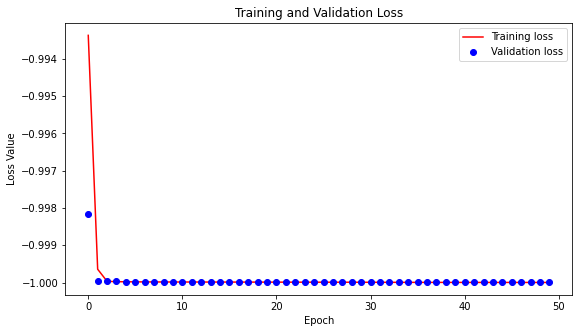

In [ ]:
loss = history.history['custom_cca_loss']
val_loss = history.history['val_custom_cca_loss']

epochs = range(50)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

In [ ]:
modelxlr = tf.keras.Model(inputs=ModelkccaLR.input[0],outputs=ModelkccaLR.get_layer('ouput1').output)
newxlr = modelxlr.predict(X)

modelylr = tf.keras.Model(inputs=ModelkccaLR.input[1],outputs=ModelkccaLR.get_layer('ouput2').output)
newylr = modelylr.predict(yn)

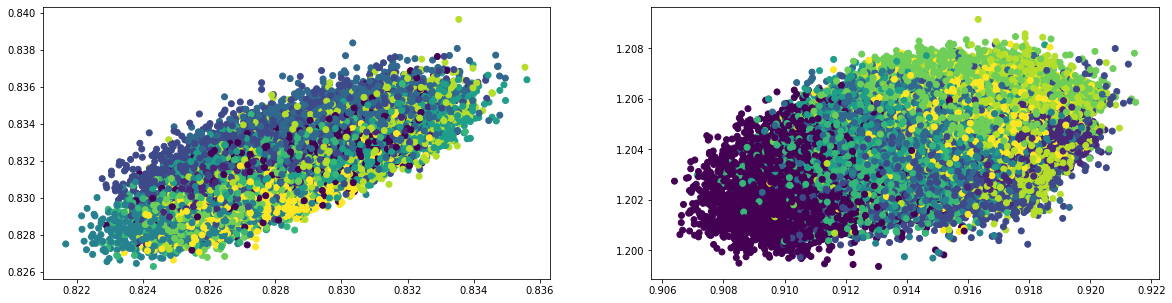

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(newxlr[:,0],newxlr[:,1],c=ytrain )

plt.subplot(1,2,2)
plt.scatter(newylr[:,0],newylr[:,1],c=ytrain )
plt.show()